# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## ML Caveats

### If the feature space is not correlated enough with the target variable, then generally  no model can have any meaningful predictive power.

### Individual variables do not necessarily need to have high correlations with the target variable (although this is generally a good thing), but altogether, the variables need to be correlated/predictive enough of the target variable. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)
import phik
from phik import resources, report

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\GI_Bleed_Cohort'

In [3]:
df_alb = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/gi_bleed_anemia_all-4.csv', index_col=0)

In [4]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2019-05-31 13:58:00  45.0   M  Black         1   >=1000    1   
1  2019-03-07 20:26:00  54.0   F  White         7  500-999    1   
2  2019-07-17 23:07:00  79.0   M  White         9   >=1000    0   
3  2020-06-21 14:45:00  75.0   M  Other         1   >=1000    0   
4  2017-01-12 17:18:00  74.0   F  Black         1   >=1000    0   

   total_ICU_LOS_hours    LOS_hours  mass_transfusion  total_transfusions  \
0          7956.633333  1016.016667                 0                   1   
1          4045.563333   531.133333                 1                   0   
2                  NaN    26.383333                 0                   1   
3                  NaN    50.916667                 0                   1   
4                  NaN  1500.383333                 0                   0   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    6                 0                   0   
1          none    4                 0                   1   
2        severe    6                 0                   1   
3          none    2                 1                   0   
4          none    6                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              758.111111               2.9                 3.2   
1               18.750000               3.1                 2.7   
2                2.806250               NaN                 NaN   
3                     NaN               NaN                 NaN   
4                     NaN               2.0                 2.4   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  \
0                            1.0                      1.0         8.4   
1                            0.0                      NaN        11.2   
2                            NaN                      NaN         4.8   
3                            NaN                      NaN        15.6   
4                            1.0                      0.0        14.7   

   time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                     1  11.0      1          0             1            0   
1                     0   NaN      0          1             0            0   
2                     1   NaN      0          0             1            0   
3                     1   NaN      1          0             0            0   
4                     1  15.0      1          0             1            0   

   SAPS  tenant  
0    34      45  
1    18      36  
2    29       7  
3    67      45  
4    28      46

In [5]:
df_alb.shape

(22192, 35)

In [6]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20734
Number of unique encounters: 22192


In [7]:
df_alb.isnull().sum()

personid                             0
encounterid                          0
index_date                           0
age                                  2
sex                                 44
race                              1083
zip_code                             0
bed_size                             0
ICU                                  0
total_ICU_LOS_hours              15107
LOS_hours                            1
mass_transfusion                     0
total_transfusions                   0
anemia_status                        0
CCI                                  0
30_day_mortality                     0
30_day_readmission                   0
days_until_readmission            9400
bl_albumin_value                  8627
last_albumin_value                8627
albumin_lab_baseline_severity     8627
normal_albumin_achieved          13462
hemoglobin                         968
time_to_albumin                     93
albumin_timing                       0
5_percent_albumin        

In [8]:
df_alb.anemia_status.head()

0    moderate
1        none
2      severe
3        none
4        none
Name: anemia_status, dtype: object

In [9]:
# df_alb = df_alb.loc[(df_alb['Cirrhosis'] < 0.5) & (df_alb['anemia_status'] == 'severe')]

In [10]:
# df_alb.shape

## Load Non Albumin Data

In [11]:
df_no_alb = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/no_albumin_gi_bleed_anemia_all-3.csv', index_col=0)

In [12]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2018-12-11 02:47:00  76.0   M  White         8   >=1000    0   
1  2018-12-22 18:14:00  80.0   F  White         1   >=1000    0   
2  2017-05-20 15:01:00  62.0   M  White         9   >=1000    0   
3  2018-11-29 21:57:00  86.0   M  White         0  500-999    0   
4  2020-02-08 21:45:16  75.0   F  White         3  500-999    0   

   total_ICU_LOS_hours   LOS_hours  mass_transfusion  total_transfusions  \
0                  NaN  208.016667                 0                   0   
1                  NaN  245.266667                 0                   1   
2                  NaN   51.650000                 0                   0   
3                  NaN  191.700000                 0                   1   
4                  NaN  121.412222                 0                   1   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    2                 0                   0   
1        severe    2                 0                   0   
2          none    3                 0                   0   
3      moderate    2                 0                   1   
4      moderate    5                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              321.625000               3.3                 2.9   
1               33.510417               NaN                 NaN   
2              559.286806               4.0                 3.4   
3               10.081944               3.3                 3.1   
4              122.702975               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  MELD  \
0                            0.0                      NaN         7.4  13.0   
1                            NaN                      NaN         4.3  11.0   
2                            0.0                      NaN        11.7   6.0   
3                            0.0                      NaN         8.0   7.0   
4                            NaN                      NaN         8.5   NaN   

   qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  
0      1          1             0            0    22      63  
1      0          0             0            0    32      45  
2      0          1             0            0    33      68  
3      2          0             0            0    39      51  
4      0          0             0            0    16     113

In [13]:
df_no_alb.shape

(134739, 30)

In [14]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 106515
Number of unique encounters: 134739


In [15]:
df_no_alb.isnull().sum()

personid                              0
encounterid                           0
index_date                            0
age                                   1
sex                                 319
race                               5886
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              114288
LOS_hours                            20
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            39273
bl_albumin_value                  84489
last_albumin_value                84489
albumin_lab_baseline_severity     84489
normal_albumin_achieved          114420
hemoglobin                        19241
MELD                              75143
qSOFA                                 0


## Examine Difference In Vars

In [16]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [17]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [18]:
lst3 = [x for x in lst1 if x not in lst2]

In [19]:
lst3

['time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type']

In [20]:
df_alb[['time_to_albumin', 'albumin_timing', '5_percent_albumin', \
       '25_percent_albumin', 'unknown_albumin_type']].head(10)

time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   
5       550.833333               0                  1                   0   
6        17.600000               1                  0                   0   
7         2.250000               1                  0                   0   
8        73.900000               0                  0                   1   
9        38.790556               0                  0                   1   

   unknown_albumin_type  
0                     1  
1                     0  
2                     1  
3                     1  
4                     1  
5                     0  
6                     1  
7                     1  
8                     0  
9                     0

## Remove variables not relevant to analysis 

In [21]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [22]:
# albumin dataset = all 1s 
# df_alb = df_alb.assign(albumin = 1)

In [23]:
# no albumin dataset = all 0s
# df_no_alb = df_no_alb.assign(albumin = 0)

In [24]:
# df_alb.shape

In [25]:
# df_no_alb.shape

In [26]:
# df_alb.head()

In [27]:
# df_no_alb.head()

## Combine Datasets

In [28]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [29]:
df.shape

(156931, 34)

In [30]:
print('Number of unique patients:', df.personid.nunique())
print('Number of unique encounters:', df.encounterid.nunique())

Number of unique patients: 122754
Number of unique encounters: 156931


In [31]:
df.head(50)

personid  \
0   001c4742-8e99-4929-9b1c-0b8c6f3e230a   
1   019634ce-13e2-4f8c-9f7f-ba5fba461d1f   
2   01d02e7a-3cd1-47dd-9d5f-188e591a04df   
3   05b4f125-f42f-4ade-ad65-f6d591c51790   
4   077a4e0b-b3ba-4025-a8b6-46a51d5183c6   
5   088a0350-8d51-43dd-9472-b208278372ae   
6   0a3154dd-d980-434a-af99-6f25cad83298   
7   0bffecfb-6f3f-4fba-a73f-684dfb888b33   
8   10b58aae-9abd-40f6-b1ed-fb394b5a8e57   
9   138a5556-63ee-4e60-b826-e1dc72628a0a   
10  19ae9a31-6f48-41e9-8902-65e6b2d3d001   
11  1b32ad01-1ee5-4c32-939b-eb6e6e5e3a48   
12  1d7f46c0-6f92-403b-b24c-cb4b653dca99   
13  1df390c3-18b8-41b0-acd9-23495059e97a   
14  1f7e4dd3-9985-4039-8099-ecea6ec7b94d   
15  1fd1313b-acbb-4744-828f-6a6809dbf561   
16  23221ca2-943d-40b1-8566-dc3e9d515775   
17  247c6aba-af0a-47fb-989a-f529ab420605   
18  2634b554-7b04-4abf-969d-2ffcde666661   
19  28ed58a7-f0a6-4383-8fa4-2e902b48ffc4   
20  2a2b87b9-905b-4ab7-8ba2-d63e7a3618ca   
21  2ab3ed5c-6e1d-41b0-b298-87aa387ceb13   
22  2b0bd82b-e305-4991-baf2-49a302ab1d2e   
23  2b4b67be-894a-415d-b241-6f64f5220bfb   
24  2d4989b3-7bd5-43a9-bf7f-f23e1b9bcb22   
25  2e2a8de8-2c5c-4a16-9fec-24e32d68ee56   
26  304a6435-d093-46ba-9eeb-28c65cfadf65   
27  3156e8fc-240f-40c8-8db2-c2446b652659   
28  359efbf5-44c0-4454-b18a-85a8e961d0d2   
29  36bac901-4c48-46d1-80dd-96cd8705fccd   
30  370a3e99-33e6-404a-8db4-187b1ba0a648   
31  37538836-dd53-4916-8614-d2d5067d17bd   
32  385016ac-0885-4fd8-8761-c65af40f66da   
33  394ffd20-e1e7-44c2-b991-93f115e71da0   
34  39d47ec2-2f69-4ab7-a93a-c59319331259   
35  3cc07cf0-d9b1-486a-a33f-7a0db69304dd   
36  3dd84581-4d59-43f2-ad28-8533144312cc   
37  3e61e48c-91d7-466b-8dff-89c791002dc6   
38  43c7671f-8311-40d6-861f-91e668874c01   
39  4977e0ee-27ef-4f1f-9833-3e26ddbc39b3   
40  4a8d6b06-391b-4c3d-8f9c-3dfd1f2cbffa   
41  4bf4a15e-626c-429c-9e90-86f7d31bc966   
42  4daa05d1-bbf7-462f-8623-fed7204b3135   
43  4ead1736-858d-4cdb-9adc-76a6660ca497   
44  4f141045-4c7d-4084-ae1d-99a994aebec8   
45  511e7212-cb6a-4a04-9d88-7f9fc66014d8   
46  51ae902d-1230-4cd4-b1b0-f8d5161d9f27   
47  51dabe14-cc4a-452c-9b2c-8d8d63b921c8   
48  52fa1f23-6e2e-4e9d-8c3e-9fe2265e946f   
49  53cd5eeb-a66b-4683-8950-845856616db6   

                             encounterid   age sex   race  zip_code bed_size  \
0   4f8fae0f-a286-4120-b78c-c60086d95f88  45.0   M  Black         1   >=1000   
1   9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a  54.0   F  White         7  500-999   
2   eef69bb8-c0a3-425d-b016-7df3a2903ed5  79.0   M  White         9   >=1000   
3   2ae26cea-7902-40ea-9f24-d65f49d03724  75.0   M  Other         1   >=1000   
4   2227d951-5657-47a0-aa62-4dcd86d6d04d  74.0   F  Black         1   >=1000   
5   3d2b1e18-f0ca-42d7-9de1-f46dfcd400a9  42.0   M  Other         0   >=1000   
6   6466f5b2-20e7-4176-9f9c-2d9aeb4219f3  54.0   M  Other         1  500-999   
7   ae7dea86-adfc-48b9-84dd-bf7c4857f6e9  80.0   F  White         6  500-999   
8   2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb  69.0   M  White         8   >=1000   
9   57dc97c2-2c28-43a1-8c15-bf7d918c6adc  73.0   M  White         2  500-999   
10  2c452c1e-8405-4692-baf1-1b2159d32e56  74.0   F  White         1   >=1000   
11  dd91c4d5-223e-41c9-afb1-894bb57b5d52  68.0   M  White         2  300-499   
12  a4e130d7-c9d0-4c2b-a71c-6d2540891463  73.0   M  White         6  500-999   
13  83aedaea-94b0-405c-a1ea-94fee7f50b52  58.0   M  Black         2  500-999   
14  b08d47a1-2a9e-4b7a-b008-f71641dcb93a  70.0   F  White         8   >=1000   
15  5d04e556-8062-4b2b-b6a1-6b0acf42cc83  69.0   M  White         1   >=1000   
16  ea4557d7-2508-45a7-ac19-9655112734ee  87.0   M  White         3  500-999   
17  7190384c-1ac1-4939-b4e8-c55282fcfcaf  77.0   F  White         1   >=1000   
18  4eeb4e42-95c6-4b90-8849-60920805623b  87.0   F  White         6  500-999   
19  b4696974-2401-4aac-88c3-e398df348d35  54.0   F  White         8   >=1000   
20  61c5c634-45f5-4671-a17e-021071364ddd  54.0   F  White         1   >=1000   
21  0298c107-0e87-48fc-a9ca

In [32]:
df.columns

Index(['personid', 'encounterid', 'age', 'sex', 'race', 'zip_code', 'bed_size',
       'ICU', 'total_ICU_LOS_hours', 'LOS_hours', 'mass_transfusion',
       'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality',
       '30_day_readmission', 'days_until_readmission', 'bl_albumin_value',
       'last_albumin_value', 'albumin_lab_baseline_severity',
       'normal_albumin_achieved', 'hemoglobin', 'time_to_albumin',
       'albumin_timing', '5_percent_albumin', '25_percent_albumin',
       'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker',
       'hemorrhagic', 'SAPS', 'tenant'],
      dtype='object')

## Select Only Columns of Interest for Subgroup Evaluation

### Albumin_24hrs, Cirrhosis, Anemia_Status, and 30 Day Mortality Variables

In [33]:
df = df[['personid', 'encounterid', 'albumin_timing', 'Cirrhosis', 'anemia_status', '30_day_mortality', \
         'ICU', 'mass_transfusion', 'total_transfusions', 'CCI', 'bl_albumin_value', \
         'qSOFA', 'beta_blocker', 'hemorrhagic', 'SAPS']]

In [34]:
# df.drop(columns=['bl_albumin_value'], inplace=True)

## Look at variables, null values

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   personid            156931 non-null  object 
 1   encounterid         156931 non-null  object 
 2   albumin_timing      22192 non-null   float64
 3   Cirrhosis           156931 non-null  int64  
 4   anemia_status       156931 non-null  object 
 5   30_day_mortality    156931 non-null  int64  
 6   ICU                 156931 non-null  int64  
 7   mass_transfusion    156931 non-null  int64  
 8   total_transfusions  156931 non-null  int64  
 9   CCI                 156931 non-null  int64  
 10  bl_albumin_value    63815 non-null   float64
 11  qSOFA               156931 non-null  int64  
 12  beta_blocker        156931 non-null  int64  
 13  hemorrhagic         156931 non-null  int64  
 14  SAPS                156931 non-null  int64  
dtypes: float64(2), int64(10), object(3

In [36]:
df.isnull().sum()

# total_ICU_LOS_hours  set as 0
# days_until_readmission remove

# bl_albumin_value                  remove all
# last_albumin_value                
# albumin_lab_baseline_severity

# normal_albumin_achieved  \\ started out low, achieved normal albumin
# patients with low albumin initially
# remove

# time_to_albumin
# albumin_timing - 24 hrs albumin

# time_to_albumin -- remove variable completely

personid                   0
encounterid                0
albumin_timing        134739
Cirrhosis                  0
anemia_status              0
30_day_mortality           0
ICU                        0
mass_transfusion           0
total_transfusions         0
CCI                        0
bl_albumin_value       93116
qSOFA                      0
beta_blocker               0
hemorrhagic                0
SAPS                       0
dtype: int64

## Fill or Drop Rows with Null Values, Other

In [37]:
# change name of albumin_timing to albumin_24hrs var

df.rename(columns = {'albumin_timing':'albumin_24hrs'}, inplace=True)

In [38]:
# fill in all NA related to albumin variables with 0

df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)

In [39]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

   albumin_24hrs  Cirrhosis anemia_status  30_day_mortality  ICU  \
0            0.0          0      moderate                 0    1   
1            0.0          1          none                 0    1   
2            1.0          0        severe                 0    0   
3            0.0          0          none                 1    0   
4            0.0          0          none                 0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    6               2.9      1   
1                 1                   0    4               3.1      0   
2                 0                   1    6               NaN      0   
3                 0                   1    2               NaN      1   
4                 0                   0    6               2.0      1   

   beta_blocker  hemorrhagic  SAPS  
0             1            0    34  
1             0            0    18  
2             1            0    29  
3             0            0    67  
4             1            0    28

In [40]:
df.isnull().sum()

personid                  0
encounterid               0
albumin_24hrs             0
Cirrhosis                 0
anemia_status             0
30_day_mortality          0
ICU                       0
mass_transfusion          0
total_transfusions        0
CCI                       0
bl_albumin_value      93116
qSOFA                     0
beta_blocker              0
hemorrhagic               0
SAPS                      0
dtype: int64

In [41]:
df['albumin_24hrs'].value_counts()

0.0    147828
1.0      9103
Name: albumin_24hrs, dtype: int64

In [42]:
df['personid'].nunique()

122754

In [43]:
df['encounterid'].nunique()

156931

In [44]:
# these will not be useful for exploratory analyis / modeling
# EDIT: KEEP FOR PSM
# df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [45]:
df.shape

(156931, 15)

In [46]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

   albumin_24hrs  Cirrhosis anemia_status  30_day_mortality  ICU  \
0            0.0          0      moderate                 0    1   
1            0.0          1          none                 0    1   
2            1.0          0        severe                 0    0   
3            0.0          0          none                 1    0   
4            0.0          0          none                 0    0   

   mass_transfusion  total_transfusions  CCI  bl_albumin_value  qSOFA  \
0                 0                   1    6               2.9      1   
1                 1                   0    4               3.1      0   
2                 0                   1    6               NaN      0   
3                 0                   1    2               NaN      1   
4                 0                   0    6               2.0      1   

   beta_blocker  hemorrhagic  SAPS  
0             1            0    34  
1             0            0    18  
2             1            0    29  
3             0            0    67  
4             1            0    28

In [47]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   personid            156931 non-null  object 
 1   encounterid         156931 non-null  object 
 2   albumin_24hrs       156931 non-null  float64
 3   Cirrhosis           156931 non-null  int64  
 4   anemia_status       156931 non-null  object 
 5   30_day_mortality    156931 non-null  int64  
 6   ICU                 156931 non-null  int64  
 7   mass_transfusion    156931 non-null  int64  
 8   total_transfusions  156931 non-null  int64  
 9   CCI                 156931 non-null  int64  
 10  bl_albumin_value    63815 non-null   float64
 11  qSOFA               156931 non-null  int64  
 12  beta_blocker        156931 non-null  int64  
 13  hemorrhagic         156931 non-null  int64  
 14  SAPS                156931 non-null  int64  
dtypes: float64(2), int64(10), object(3

## Encode Variables as Necessary

In [48]:
# Binary Variables: sex (removed)

# Ordinal Variables: bed_size (removed), anemia_status

# Neither: race (removed)

In [49]:
df['anemia_status'].value_counts()

moderate    57350
none        47591
severe      39268
mild        12722
Name: anemia_status, dtype: int64

In [50]:
# used ordinal encoder
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer((OrdinalEncoder(categories=as_ord), \
                                      ['anemia_status']))

In [51]:
df = df.reset_index(drop=True)

In [52]:
df.isnull().sum()

personid                  0
encounterid               0
albumin_24hrs             0
Cirrhosis                 0
anemia_status             0
30_day_mortality          0
ICU                       0
mass_transfusion          0
total_transfusions        0
CCI                       0
bl_albumin_value      93116
qSOFA                     0
beta_blocker              0
hemorrhagic               0
SAPS                      0
dtype: int64

In [53]:
df['anemia_status'].value_counts()

moderate    57350
none        47591
severe      39268
mild        12722
Name: anemia_status, dtype: int64

In [54]:
df['anemia_status'] = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['anemia_status'])

In [55]:
df['anemia_status'].value_counts()

2.0    57350
0.0    47591
3.0    39268
1.0    12722
Name: anemia_status, dtype: int64

In [56]:
df.columns.tolist()

['personid',
 'encounterid',
 'albumin_24hrs',
 'Cirrhosis',
 'anemia_status',
 '30_day_mortality',
 'ICU',
 'mass_transfusion',
 'total_transfusions',
 'CCI',
 'bl_albumin_value',
 'qSOFA',
 'beta_blocker',
 'hemorrhagic',
 'SAPS']

In [57]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [58]:
# quick look at distributions

df.describe()

albumin_24hrs      Cirrhosis  anemia_status  30_day_mortality  \
count  156931.000000  156931.000000  156931.000000     156931.000000   
mean        0.058006       0.202853       1.562636          0.072229   
std         0.233756       0.402126       1.163209          0.258868   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       2.000000          0.000000   
75%         0.000000       0.000000       3.000000          0.000000   
max         1.000000       1.000000       3.000000          1.000000   

                 ICU  mass_transfusion  total_transfusions            CCI  \
count  156931.000000     156931.000000       156931.000000  156931.000000   
mean        0.175466          0.024833            0.780776       3.646220   
std         0.380366          0.155615            1.728480       2.706541   
min         0.000000          0.000000            0.000000       0.000000   
25%         0.000000          0.000000            0.000000       1.000000   
50%         0.000000          0.000000            0.000000       3.000000   
75%         0.000000          0.000000            1.000000       5.000000   
max         1.000000          1.000000           99.000000      21.000000   

       bl_albumin_value          qSOFA   beta_blocker    hemorrhagic  \
count      63815.000000  156931.000000  156931.000000  156931.000000   
mean           3.012665       0.405917       0.282870       0.057720   
std            0.703660       0.648826       0.450395       0.233213   
min            0.002700       0.000000       0.000000       0.000000   
25%            2.500000       0.000000       0.000000       0.000000   
50%            3.000000       0.000000       0.000000       0.000000   
75%            3.500000       1.000000       1.000000       0.000000   
max            6.300000       3.000000       1.000000       1.000000   

                SAPS  
count  156931.000000  
mean       24.472303  
std        11.553063  
min         0.000000  
25%        17.000000  
50%        23.000000  
75%        30.000000  
max       112.000000

In [59]:
df.isnull().sum()

personid                  0
encounterid               0
albumin_24hrs             0
Cirrhosis                 0
anemia_status             0
30_day_mortality          0
ICU                       0
mass_transfusion          0
total_transfusions        0
CCI                       0
bl_albumin_value      93116
qSOFA                     0
beta_blocker              0
hemorrhagic               0
SAPS                      0
dtype: int64

## Apply conditions to create final df

In [60]:
f_df = df.loc[(df['Cirrhosis'] < 0.5) & (df['anemia_status'] > 2.5)]

In [61]:
f_df.shape

(30208, 15)

In [62]:
print('Number of unique patients:', f_df.personid.nunique())
print('Number of unique encounters:', f_df.encounterid.nunique())

Number of unique patients: 27374
Number of unique encounters: 30208


In [63]:
f_df.isnull().sum()

personid                  0
encounterid               0
albumin_24hrs             0
Cirrhosis                 0
anemia_status             0
30_day_mortality          0
ICU                       0
mass_transfusion          0
total_transfusions        0
CCI                       0
bl_albumin_value      17908
qSOFA                     0
beta_blocker              0
hemorrhagic               0
SAPS                      0
dtype: int64

In [64]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

# f_df.dropna(inplace=True)

In [65]:
f_df.drop(columns=['bl_albumin_value'], inplace=True)

C:\Users\Iweimer\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
f_df.shape

(30208, 14)

In [67]:
f_df.isnull().sum()

personid              0
encounterid           0
albumin_24hrs         0
Cirrhosis             0
anemia_status         0
30_day_mortality      0
ICU                   0
mass_transfusion      0
total_transfusions    0
CCI                   0
qSOFA                 0
beta_blocker          0
hemorrhagic           0
SAPS                  0
dtype: int64

In [68]:
f_df.shape

(30208, 14)

## Convert Numeric Outcome Variables to Categorical

## Export as csv for other analysis

In [69]:
f_df.to_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/GI_Bleed_Tables/albumin_cleaned_for_psm_sg1_nobl.csv', index=False)

In [170]:
## update: will convert to categorical after matching

## Convert LOS_Hours and ICU_LOS_hours Vars to Days Vars

In [360]:
f_df['LOS_days'] = f_df['LOS_hours']/24
f_df.drop(columns=['LOS_hours'], inplace=True)

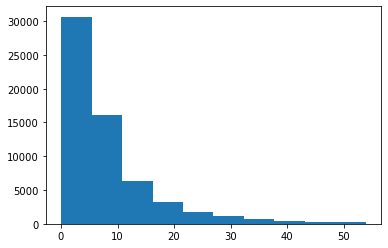

In [361]:
plt.hist(f_df['LOS_days']);

In [362]:
f_df['LOS_days'].describe()

count    61109.000000
mean         8.458117
std          8.253185
min          0.050000
25%          3.250694
50%          5.402778
75%         10.197917
max         53.870833
Name: LOS_days, dtype: float64

## Convert LOS_days to Categorical

In [363]:
# Calculate Tertiles

q1 = f_df['LOS_days'].quantile(q=(1/3))
q2 = f_df['LOS_days'].quantile(q=(2/3))
print(q1)
print(q2)

3.9493364197530854
8.041435185185177


In [364]:
# bin the LOS_days var

LOS = f_df['LOS_days']
m = max(LOS)

bins = [0, 3.9493364197530854, 8.041435185185177, m]
labels=[0, 1, 2]

# 0 - Low/Short Length of Stay
# 1 - Medium Length of Stay
# 2 - High/Long Length of Stay

f_df['LOS_days'] = pd.cut(LOS, bins=bins, labels=labels, include_lowest=True)

In [365]:
f_df['LOS_days'].value_counts()

0    20370
2    20370
1    20369
Name: LOS_days, dtype: int64